# K-Means Clustering

K-means clustering is an *unsupervised* learning algorithm used to analyze a set of training examples $\left\{x^{(1)},x^{(2)},\ldots,x^{(m)}\right\}$ and obtain a set of $K$ clusters. The model is described as unsupervised due to the fact that there isn't really a 'correct' label to predict. Rather, algorithms of these sort attempt to analyze the relationships present in the data in and of itself with no explicit ground truth label. This can be represented as a set of training examples.

## Algorithm

1. Randomly initialize $K$ cluster centroids, denoted as $\mu_j$ for $j\in[1,\ldots,K]$

2. Compute the distances of each data point. This is typically done using the Euclidean distance. This can be represented as a distance matrix $D\in\mathbb{R}^{m\times K}$ where
$$
    D_{i,j}=||x^{(i)} - \mu_j||^2
$$

3. Assign the datapoint to the cluster centroid closest to it, denoted as $\mu_{x^{(i)}}$.
$$
\mu_{x^{(i)}}=\underset{j}{\operatorname{arg max}} D_{i,j}=\underset{j}{\operatorname{arg max}} ||x^{(i)} - \mu_j||^2
$$

4. Recompute the new cluster centroid by taking the mean of the data points assigned to it

5. Repeat step $2$ until *convergence*. 

## Implementation

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patheffects as pe

sns.set()

In [2]:
n_clusters = 5
X, y = make_blobs(n_samples = 500, centers = n_clusters, n_features = 2, random_state = 42)
X.shape, y.shape

((500, 2), (500,))

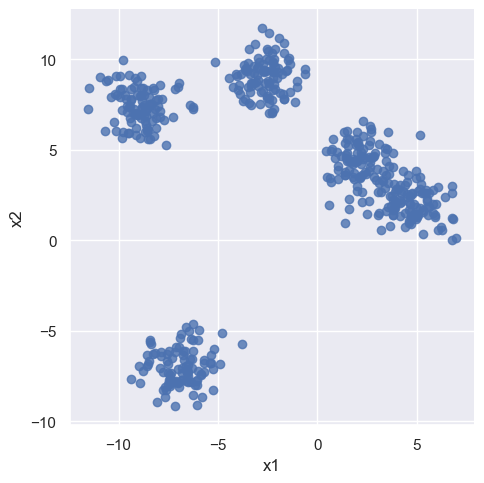

In [3]:
df = pd.DataFrame({
    'x1': X[:, 0],
    'x2': X[:, 1],
})

sns.lmplot(df, x = "x1", y = "x2", fit_reg = False)
plt.show()

In [4]:
def compute_cluster_assingments(X_data, centroids):
    n_clusters = centroids.shape[0]
    distances  = (np.tile(X_data, n_clusters) - centroids.reshape(1, -1)) ** 2
    distances  = distances.reshape((distances.shape[0], n_clusters, -1))
    distances  = np.sum(distances, axis = 2)

    return np.argmin(distances, axis = 1)

def fit_kmeans_cluster(K, X_data, num_iter = None, min_avg_update_dist = None, random_seed = 0):

    random    = np.random.RandomState(random_seed)
    centroids = X_data[random.choice(np.arange(0, X_data.shape[0]), n_clusters)] + random.randn(n_clusters, X_data.shape[1])
    cent_hist = []
    
    curr_iter = 0

    while True:
        assignments = compute_cluster_assingments(X_data, centroids)
        prev_cent   = centroids.copy()
        cent_hist.append(prev_cent)

        for cluster_idx in range(K):
            members = X_data[assignments == cluster_idx]
            new_loc = np.mean(members, axis = 0, keepdims = True)
            centroids[cluster_idx, :] = new_loc
        
        curr_iter += 1

        # Either stop based on num_iter or if centroids update less than min_update_dist
        if num_iter:
            stop_condition = curr_iter >= num_iter 
        elif min_avg_update_dist:
            dist_from_prev = np.sqrt(np.sum((centroids - prev_cent) ** 2, axis = 1))
            mean_dist_prev = np.mean(dist_from_prev)
            stop_condition = mean_dist_prev < min_avg_update_dist

        if stop_condition:
            break
    
    return centroids, cent_hist

centroids, hist = fit_kmeans_cluster(n_clusters, X, min_avg_update_dist = 1e-3)

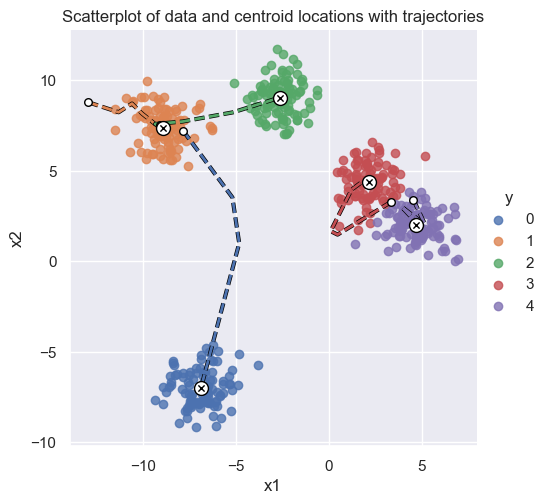

In [5]:
c = compute_cluster_assingments(X, centroids)
df = pd.DataFrame({
    'x1': X[:, 0],
    'x2': X[:, 1],
    'y' : pd.Series(c, dtype = 'category')
})

sns.lmplot(df, x = "x1", y = "x2", hue = "y", fit_reg = False, scatter_kws={"zorder":1})


trajectories = np.zeros((len(hist), n_clusters, X.shape[1]))
for idx in range(trajectories.shape[0]):
    trajectories[idx, :, :] = hist[idx]

for idx in range(n_clusters):
    plt.plot(trajectories[:, idx, 0], trajectories[:, idx, 1], lw = 2, linestyle = 'dashed', path_effects=[pe.Stroke(linewidth=3, foreground='black'), pe.Normal()], zorder = 2)
    plt.scatter(trajectories[0, idx, 0], trajectories[0, idx, 1], marker='o', s = 30, facecolor = 'white', edgecolors = 'black', zorder = 3)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s = 100, facecolor = 'white', edgecolors = 'black', zorder = 4)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s = 20, c = 'black', linewidth = 1, zorder = 5)

    
plt.title('Scatterplot of data and centroid locations with trajectories')
plt.show()